# Given that the first move made by the first player in Tic Tac Toe is a corner, what is the probability the game will end in a draw? (Assuming all moves after the first are random)

In [1]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
EMPTY = " "
PLAYER_X = "X"
PLAYER_O = "O"
CORNER_POSITIONS = [0, 2, 6, 8]

In [3]:
def check_winner(board):
    wins = [
        [0,1,2], [3,4,5], [6,7,8],     # Rows
        [0,3,6], [1,4,7], [2,5,8],     # Columns
        [0,4,8], [2,4,6]               # Diagonals
    ]
    for a, b, c in wins:
        if board[a] != EMPTY and board[a] == board[b] == board[c]:
            return board[a]
    return None

In [4]:
def is_draw(board):
    return EMPTY not in board and check_winner(board) is None

In [5]:
def available_moves(board):
    return [i for i, val in enumerate(board) if val == EMPTY]

In [6]:
def make_random_move(board, player):
    moves = available_moves(board)
    if moves:
        move = random.choice(moves)
        board[move] = player

In [7]:
def simulate_game():
    board = [EMPTY] * 9
    first_move = random.choice(CORNER_POSITIONS)
    board[first_move] = PLAYER_X
    current_player = PLAYER_O

    while True:
        if check_winner(board) or is_draw(board):
            break
        make_random_move(board, current_player)
        current_player = PLAYER_X if current_player == PLAYER_O else PLAYER_O

    winner = check_winner(board)
    if winner == PLAYER_X:
        return "X wins"
    elif winner == PLAYER_O:
        return "O wins"
    elif is_draw(board):
        return "Draw"
    else:
        return "Unknown"

In [8]:
def run_simulations(n_games=10000):
    results = []
    for _ in range(n_games):
        result = simulate_game()
        results.append(result)
    return pd.DataFrame(results, columns=["Result"])

In [9]:
def visualize_results(df):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x="Result", palette="pastel")
    plt.title("Tic Tac Toe Outcomes (First Move in Corner)")
    plt.xlabel("Game Outcome")
    plt.ylabel("Count")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height}', ha="center")
    plt.tight_layout()
    plt.show()

Outcome probabilities:
Result
X wins    0.6095
O wins    0.2627
Draw      0.1278
Name: proportion, dtype: float64


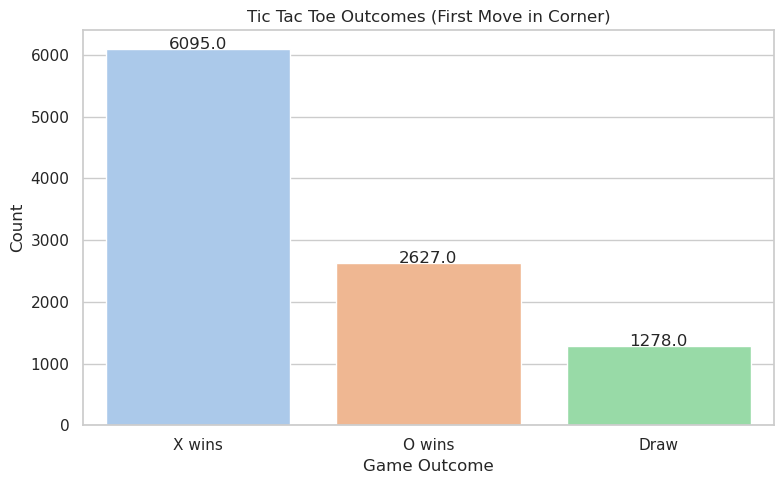

In [10]:
if __name__ == "__main__":
    n_trials = 10000
    df_results = run_simulations(n_trials)
    proportions = df_results["Result"].value_counts(normalize=True)
    print("Outcome probabilities:")
    print(proportions)
    visualize_results(df_results)

The percentage of games that will end in a draw given that the first move made by the first player in Tic Tac Toe is a corner (and assuming all moves after the first are random) is about 12.78 percent of games. In 10000 trials, 1278 of them ended in a draw if the first move was a corner. The total sample space is 10,000 games, so (1278/10000) x 100 gets us 12.78 percent. A potential bias that can come from these trials is that the simulation does not take into account whether or not one or both players have a strategy in mind. 